In [ ]:
import pandas as pd
import torch
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings


In [ ]:
df = pd.read_csv("flipkart_reviews_dataset.csv")

<Figure size 2500x2000 with 0 Axes>

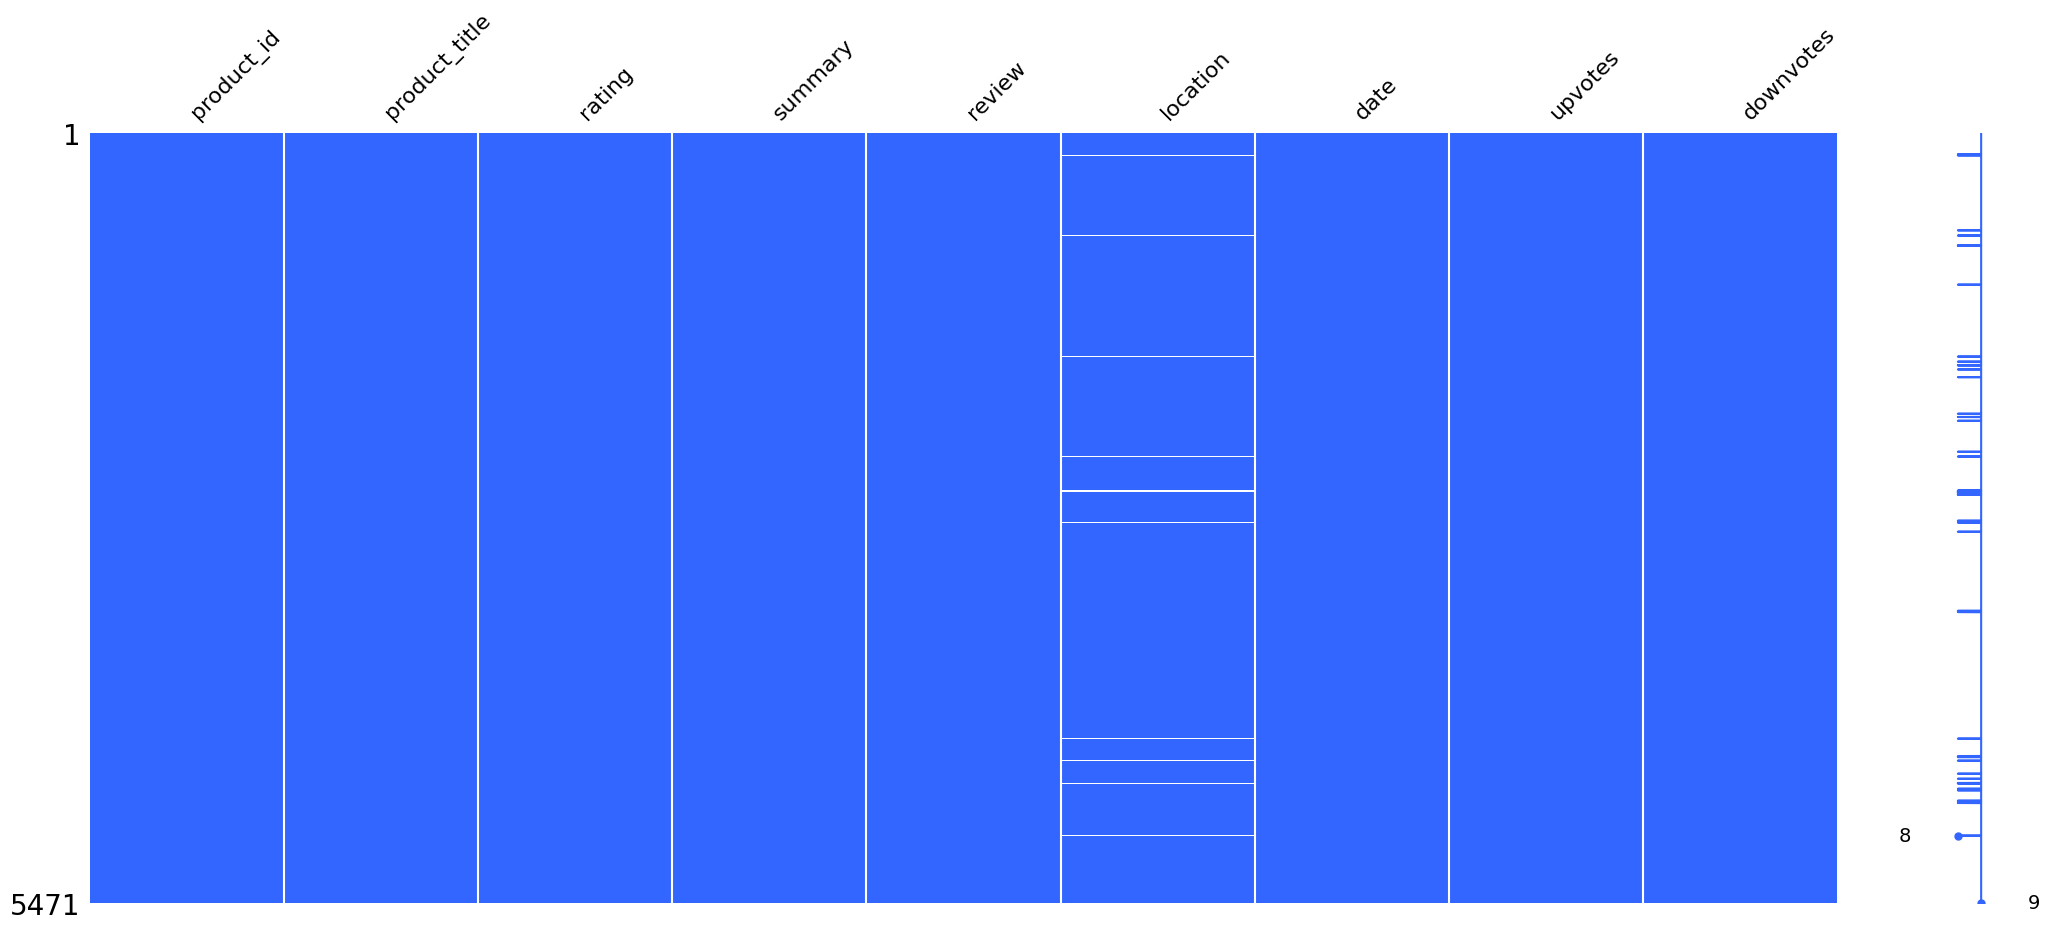

In [ ]:
import missingno as msno
plt.figure(figsize=(25, 20))
msno.matrix(df, color=[0.2, 0.4, 1])
plt.show()

In [ ]:
# Dropping the rows with missing values

df.dropna(inplace=True, axis=0)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5414 entries, 0 to 5470
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     5414 non-null   object
 1   product_title  5414 non-null   object
 2   rating         5414 non-null   int64 
 3   summary        5414 non-null   object
 4   review         5414 non-null   object
 5   location       5414 non-null   object
 6   date           5414 non-null   object
 7   upvotes        5414 non-null   int64 
 8   downvotes      5414 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 423.0+ KB


<Figure size 2500x2000 with 0 Axes>

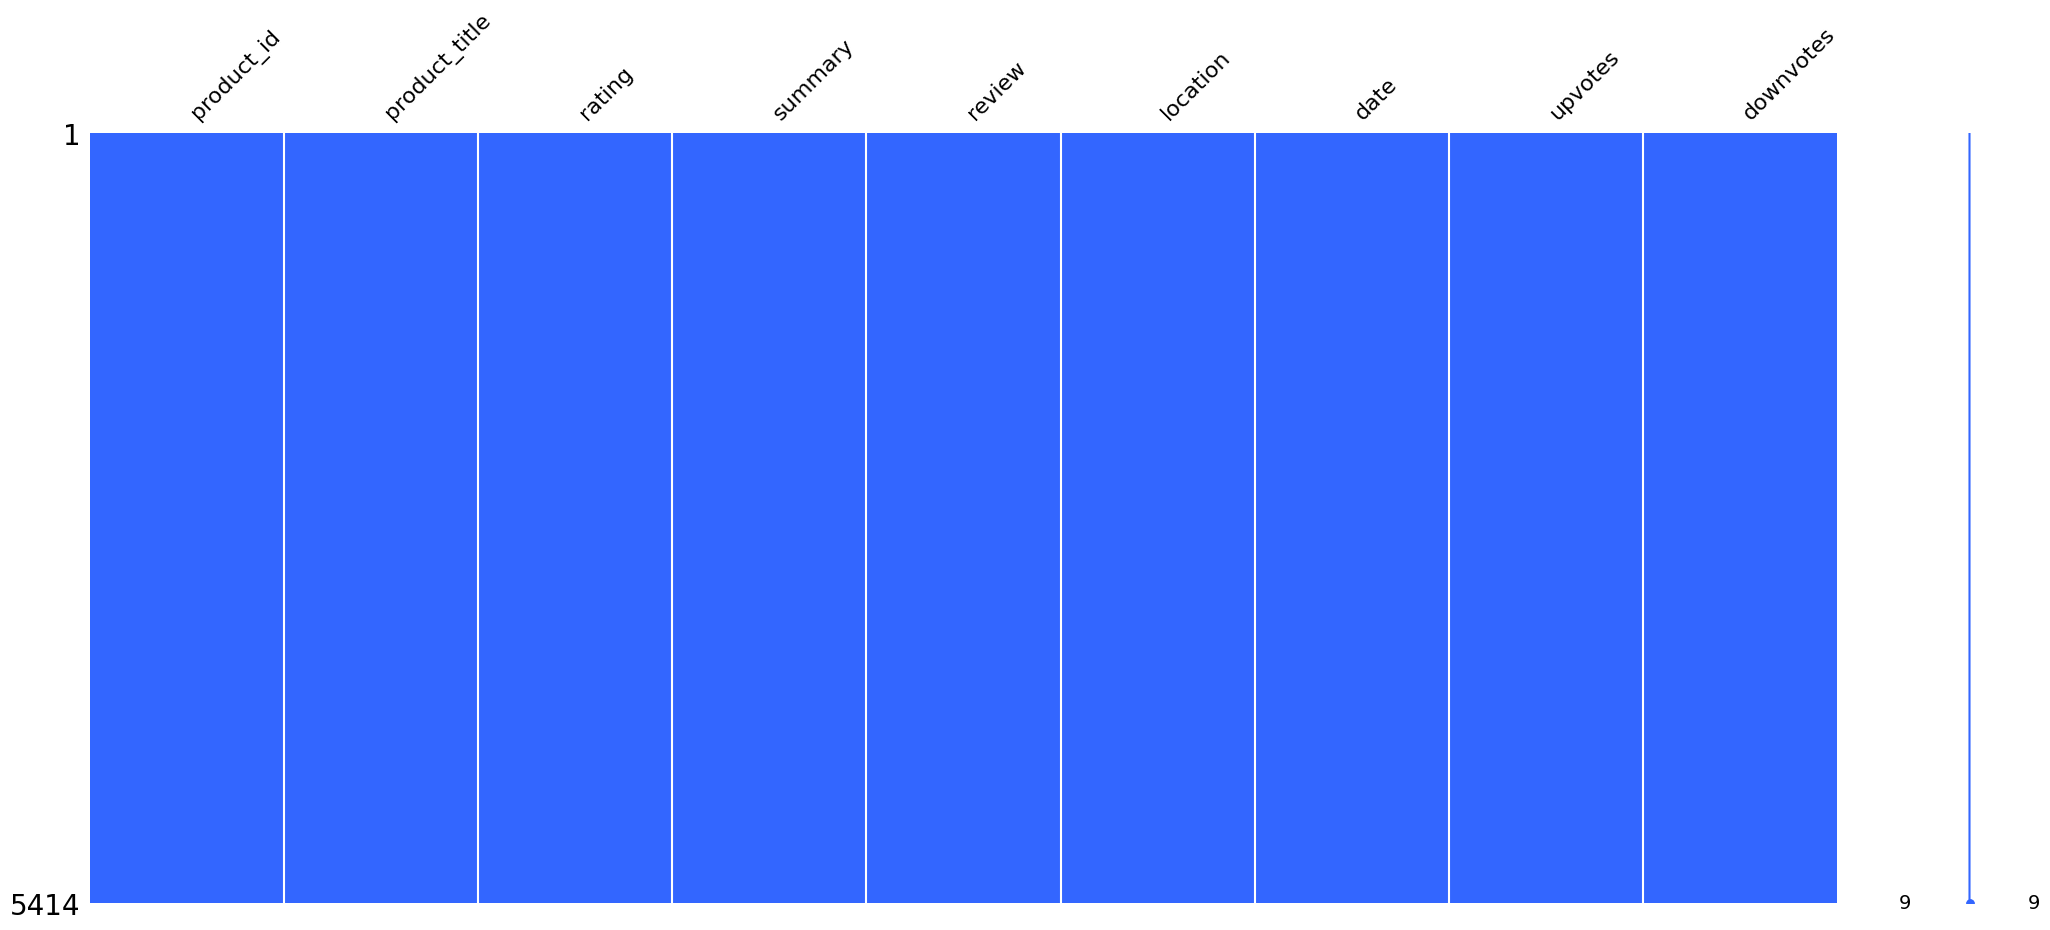

In [ ]:
import missingno as msno
plt.figure(figsize=(25, 20))
msno.matrix(df, color=[0.2, 0.4, 1])
plt.show()


In [ ]:
df.head()

,product_id,product_title,rating,summary,review,location,date,upvotes,downvotes
0,ACCG2TC8SURNPZAA,Aroma NB119B Badshah - 40 Hours Playtime Bluet...,5,Super!,Super bass good quality excellent 👍 very good ...,Ernakulam District,"Oct, 2021",2635,633
1,ACCG2TC8SURNPZAA,Aroma NB119B Badshah - 40 Hours Playtime Bluet...,5,Awesome,Product is so good. Quality is very good . I r...,Nagaur District,"Aug, 2021",2497,685
2,ACCG2TC8SURNPZAA,Aroma NB119B Badshah - 40 Hours Playtime Bluet...,5,Mind-blowing purchase,This is really a very good neckband and it giv...,Patna,"Aug, 2021",2117,586
3,ACCG2TC8SURNPZAA,Aroma NB119B Badshah - 40 Hours Playtime Bluet...,1,Useless product,My product delivered is 18/02/2022And Return p...,Sayan,"Feb, 2022",241,73
4,ACCG2TC8SURNPZAA,Aroma NB119B Badshah - 40 Hours Playtime Bluet...,1,Horrible,Delivered on 18 dec 21. I am posting this on 1...,Palakkad District,"Jan, 2022",674,268


##SPAM

In [ ]:
import os
from collections import Counter
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline  
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
dfs=pd.read_csv('Labelled Yelp Dataset.csv',on_bad_lines="skip")

In [ ]:
dfs.head()

,User_id,Product_id,Rating,Date,Review,Label
0,923,0,3,12-08-2014,The food at snack is a selection of popular Gr...,-1.0
1,924,0,3,5/16/2013,This little place in Soho is wonderful. I had ...,-1.0
2,925,0,4,07-01-2013,ordered lunch for 15 from Snack last Friday. Â...,-1.0
3,926,0,4,7/28/2011,This is a beautiful quaint little restaurant o...,-1.0
4,927,0,4,11-01-2010,Snack is great place for a Â casual sit down l...,-1.0


In [ ]:
dfs.head(10)

,User_id,Product_id,Rating,Date,Review,Label
0,923,0,3,12-08-2014,The food at snack is a selection of popular Gr...,-1.0
1,924,0,3,5/16/2013,This little place in Soho is wonderful. I had ...,-1.0
2,925,0,4,07-01-2013,ordered lunch for 15 from Snack last Friday. Â...,-1.0
3,926,0,4,7/28/2011,This is a beautiful quaint little restaurant o...,-1.0
4,927,0,4,11-01-2010,Snack is great place for a Â casual sit down l...,-1.0
5,928,0,4,09-02-2009,A solid 4 stars for this greek food spot. Â If...,-1.0
6,929,0,4,8/25/2009,Let me start with a shout-out to everyone who ...,-1.0
7,930,0,4,5/20/2007,Love this place Â Try the Chicken sandwich or...,-1.0
8,931,0,4,12/27/2005,My friend and I were intrigued by the nightly ...,-1.0
9,932,0,5,05-09-2014,Stopped in for lunch today and couldn't believ...,-1.0


In [ ]:
dfs = dfs.loc[:, ['Review', 'Label']]

# replace the values in the "Label" column
dfs['Label'] = dfs['Label'].replace({-1: 1, 1: 0})

dfs = dfs.rename(columns={"Label":"label", "Review":"sms"})

## Making the data sets

In [ ]:
dfs.head(5)

,sms,label
0,The food at snack is a selection of popular Gr...,1.0
1,This little place in Soho is wonderful. I had ...,1.0
2,ordered lunch for 15 from Snack last Friday. Â...,1.0
3,This is a beautiful quaint little restaurant o...,1.0
4,Snack is great place for a Â casual sit down l...,1.0


In [ ]:
#Number of observations in each label spam and ham
dfs.label.value_counts()

0.0    10539
1.0     1260
Name: label, dtype: int64

In [ ]:
dfs.describe()

,label
count,11799.000000
mean,0.106789
std,0.308858
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
dfs['length'] = dfs['sms'].apply(len)
dfs.head(5)

,sms,label,length
0,The food at snack is a selection of popular Gr...,1.0,215
1,This little place in Soho is wonderful. I had ...,1.0,269
2,ordered lunch for 15 from Snack last Friday. Â...,1.0,180
3,This is a beautiful quaint little restaurant o...,1.0,493
4,Snack is great place for a Â casual sit down l...,1.0,601


In [ ]:
dfs = dfs.dropna(subset=['label'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfs['sms'], 
                                                    dfs['label'],test_size=0.20, 
                                                    random_state=1)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

In [ ]:

count_vector = CountVectorizer(stop_words='english')

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(dfs['sms'])
testing_data = count_vector.fit_transform(dfs['sms'])
y_trained=dfs['label']
model = LogisticRegression()
model.fit(training_data, y_trained)

LogisticRegression()

In [ ]:
y_test = dfs['label']
accuracy = model.score(testing_data, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.9583015509788965


In [ ]:
new_comment = 'This product is amazing!'
X_new = count_vector.transform([new_comment])
prediction = model.predict(X_new)[0]
if prediction == 1:
    print('Spam')
else:
    print('Legitimate')

Legitimate


In [ ]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data,dfs['label'])

MultinomialNB()

In [ ]:
df.head()

,product_id,product_title,rating,summary,review,location,date,upvotes,downvotes
0,ACCG2TC8SURNPZAA,Aroma NB119B Badshah - 40 Hours Playtime Bluet...,5,Super!,Super bass good quality excellent 👍 very good ...,Ernakulam District,"Oct, 2021",2635,633
1,ACCG2TC8SURNPZAA,Aroma NB119B Badshah - 40 Hours Playtime Bluet...,5,Awesome,Product is so good. Quality is very good . I r...,Nagaur District,"Aug, 2021",2497,685
2,ACCG2TC8SURNPZAA,Aroma NB119B Badshah - 40 Hours Playtime Bluet...,5,Mind-blowing purchase,This is really a very good neckband and it giv...,Patna,"Aug, 2021",2117,586
3,ACCG2TC8SURNPZAA,Aroma NB119B Badshah - 40 Hours Playtime Bluet...,1,Useless product,My product delivered is 18/02/2022And Return p...,Sayan,"Feb, 2022",241,73
4,ACCG2TC8SURNPZAA,Aroma NB119B Badshah - 40 Hours Playtime Bluet...,1,Horrible,Delivered on 18 dec 21. I am posting this on 1...,Palakkad District,"Jan, 2022",674,268


In [ ]:
# Transform testing data and return the matrix. 
testing_data = count_vector.transform(df['review'])

In [ ]:
predictions = naive_bayes.predict(testing_data)

In [ ]:
predictions.shape

(5414,)

In [ ]:
keep_mask = predictions == 0

In [ ]:
df = df[keep_mask]

In [ ]:
df.describe()

,rating,upvotes,downvotes
count,5212.000000,5212.000000,5212.000000
mean,3.852072,31.666539,7.636032
std,1.515414,334.191829,75.431555
min,1.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000
75%,5.000000,3.000000,1.000000
max,5.000000,18027.000000,3664.000000


In [ ]:
import re


def remove_url(text):
    text = re.sub(r"http\S+", "", text)
    return text


# Example string with weird font characters plus an URL which we gonna remove.
sample = "ℍ𝕚 𝔼𝕧𝕖𝕣𝕪𝕠𝕟𝕖 𝕀 𝕒𝕞 Aarya Mahajan 𝕙𝕒𝕧𝕚𝕟𝕘 𝕥𝕙𝕖 𝕗𝕠𝕝𝕝𝕠𝕨𝕚𝕟𝕘 𝕂𝕒𝕘𝕘𝕝𝕖 𝕡𝕣𝕠𝕗𝕚𝕝𝕖 \n https://www.kaggle.com/ 𝕒𝕟𝕕 𝕀 𝕒𝕞 😊 𝕥𝕠 𝕔𝕣𝕖𝕒𝕥𝕖 𝕥𝕙𝕚𝕤 𝕟𝕠𝕥𝕖𝕓𝕠𝕠𝕜"
print(f"Text before removing url:- \n {sample}")

sample = remove_url(sample)
print(f"Text after removing url:- \n {sample}")

df['review'] = df['review'].apply(remove_url)

Text before removing url:- 
 ℍ𝕚 𝔼𝕧𝕖𝕣𝕪𝕠𝕟𝕖 𝕀 𝕒𝕞 Aarya Mahajan 𝕙𝕒𝕧𝕚𝕟𝕘 𝕥𝕙𝕖 𝕗𝕠𝕝𝕝𝕠𝕨𝕚𝕟𝕘 𝕂𝕒𝕘𝕘𝕝𝕖 𝕡𝕣𝕠𝕗𝕚𝕝𝕖 
 https://www.kaggle.com/ 𝕒𝕟𝕕 𝕀 𝕒𝕞 😊 𝕥𝕠 𝕔𝕣𝕖𝕒𝕥𝕖 𝕥𝕙𝕚𝕤 𝕟𝕠𝕥𝕖𝕓𝕠𝕠𝕜
Text after removing url:- 
 ℍ𝕚 𝔼𝕧𝕖𝕣𝕪𝕠𝕟𝕖 𝕀 𝕒𝕞 Aarya Mahajan 𝕙𝕒𝕧𝕚𝕟𝕘 𝕥𝕙𝕖 𝕗𝕠𝕝𝕝𝕠𝕨𝕚𝕟𝕘 𝕂𝕒𝕘𝕘𝕝𝕖 𝕡𝕣𝕠𝕗𝕚𝕝𝕖 
  𝕒𝕟𝕕 𝕀 𝕒𝕞 😊 𝕥𝕠 𝕔𝕣𝕖𝕒𝕥𝕖 𝕥𝕙𝕚𝕤 𝕟𝕠𝕥𝕖𝕓𝕠𝕠𝕜


In [ ]:
import unicodedata as uni

print(f"Text before Unicode Normalization:- \n {sample}")

sample = uni.normalize('NFKD', sample)
print(f"Text after Unicode Normalization:- \n {sample}")

for i in df['review']:
  i = uni.normalize('NFKD', i)

Text before Unicode Normalization:- 
 ℍ𝕚 𝔼𝕧𝕖𝕣𝕪𝕠𝕟𝕖 𝕀 𝕒𝕞 Aarya Mahajan 𝕙𝕒𝕧𝕚𝕟𝕘 𝕥𝕙𝕖 𝕗𝕠𝕝𝕝𝕠𝕨𝕚𝕟𝕘 𝕂𝕒𝕘𝕘𝕝𝕖 𝕡𝕣𝕠𝕗𝕚𝕝𝕖 
  𝕒𝕟𝕕 𝕀 𝕒𝕞 😊 𝕥𝕠 𝕔𝕣𝕖𝕒𝕥𝕖 𝕥𝕙𝕚𝕤 𝕟𝕠𝕥𝕖𝕓𝕠𝕠𝕜
Text after Unicode Normalization:- 
 Hi Everyone I am Aarya Mahajan having the following Kaggle profile 
  and I am 😊 to create this notebook


In [ ]:
!pip install demoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 KB 4.6 MB/s eta 0:00:00


In [ ]:
import demoji


def handle_emoji(string):
    emojis = demoji.findall(string)

    for emoji in emojis:
        string = string.replace(emoji, " ")

    return string


print(f"Before Handling emoji:- \n {sample}")
print(f"After Handling emoji:- \n {handle_emoji(sample)}")

df['review'] = df['review'].apply(handle_emoji)

Before Handling emoji:- 
 Hi Everyone I am Aarya Mahajan having the following Kaggle profile 
  and I am 😊 to create this notebook
After Handling emoji:- 
 Hi Everyone I am Aarya Mahajan having the following Kaggle profile 
  and I am   to create this notebook


In [ ]:
def word_tokenizer(text):
    text = text.lower()
    text = text.split()

    return text


sample = "Hi Everyone I am Ankit Gupta."
print(sample)
print(word_tokenizer(sample))


Hi Everyone I am Ankit Gupta.
['hi', 'everyone', 'i', 'am', 'ankit', 'gupta.']


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

en_stopwords = set(stopwords.words('english'))
print(f"Stop Words in English : \n{ en_stopwords}")


Stop Words in English : 
{'more', "she's", 'hers', 'for', 'about', 'here', 'out', 'such', 'yours', 'our', 'm', 'haven', 'have', 'has', 'why', 'shan', 'wouldn', 'mightn', "it's", 'above', 'until', 'weren', 'was', 'of', 'whom', "wouldn't", 'very', 've', "haven't", 'she', 'himself', 'herself', 'won', 'does', 'you', 'themselves', 'nor', 'are', 'too', 'what', "needn't", 'in', 'the', 'now', 'these', 'down', 'under', "won't", 'against', 'at', "shouldn't", 'other', 'shouldn', 'through', 'an', 'wasn', 'which', 'no', "hadn't", 'as', 're', 'but', 'by', "you've", 's', 'this', "you're", 'so', 'didn', 'hasn', "wasn't", 'is', 'any', 'same', 'to', 'be', 'aren', "mustn't", 'ourselves', 'ours', 'll', "hasn't", 'can', "should've", 'that', 'after', 'not', 'theirs', 'should', 'don', 'a', "doesn't", 'few', 'all', 'd', 'i', 'between', "couldn't", "weren't", 'were', 'off', 'on', 'because', 'both', 'there', 'o', 'myself', 'most', 'where', 'am', 'with', 'them', 'being', 'while', 'their', 'below', 'his', 'than',

In [ ]:
def remove_stopwords(text):
    text = [word for word in text if word not in en_stopwords]
    return text


print(f"Before removing stopwords : {word_tokenizer(sample)}")
print(f"After removing stopwords : {remove_stopwords(word_tokenizer(sample))}")


Before removing stopwords : ['hi', 'everyone', 'i', 'am', 'ankit', 'gupta.']
After removing stopwords : ['hi', 'everyone', 'ankit', 'gupta.']


In [ ]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer

stemmer = PorterStemmer()
# stemmer = LancasterStemmer()


def stemming(text):

    text = [stemmer.stem(word) for word in text]
    return text


sample = "I am creating a Notebook"
print(f"Before Stemming : {(sample)}")
print(f"After Stemming : {stemming(word_tokenizer(sample))}")


Before Stemming : I am creating a Notebook
After Stemming : ['i', 'am', 'creat', 'a', 'notebook']


In [ ]:
import spacy

sp = spacy.load("en_core_web_sm")

In [ ]:
def lemmatization(text):

    # text = [sp(word).lemma_ for word in text]

    text = " ".join(text)
    token = sp(text)

    text = [word.lemma_ for word in token]
    return text


print(f"Before Lemmatization : {word_tokenizer(sample)}")
print(f"After Lemmatization : {lemmatization(word_tokenizer(sample))}")

Before Lemmatization : ['i', 'am', 'creating', 'a', 'notebook']
After Lemmatization : ['I', 'be', 'create', 'a', 'notebook']


In [ ]:
df_temp = df.copy()

In [ ]:
df.head()

,product_id,product_title,rating,summary,review,location,date,upvotes,downvotes
0,ACCG2TC8SURNPZAA,Aroma NB119B Badshah - 40 Hours Playtime Bluet...,5,Super!,Super bass good quality excellent very good ...,Ernakulam District,"Oct, 2021",2635,633
1,ACCG2TC8SURNPZAA,Aroma NB119B Badshah - 40 Hours Playtime Bluet...,5,Awesome,Product is so good. Quality is very good . I r...,Nagaur District,"Aug, 2021",2497,685
2,ACCG2TC8SURNPZAA,Aroma NB119B Badshah - 40 Hours Playtime Bluet...,5,Mind-blowing purchase,This is really a very good neckband and it giv...,Patna,"Aug, 2021",2117,586
5,ACCG2TC8SURNPZAA,Aroma NB119B Badshah - 40 Hours Playtime Bluet...,5,Must buy!,Sound quality is really very good with good ba...,Mumbai,"May, 2021",803,362
6,ACCG2TC8SURNPZAA,Aroma NB119B Badshah - 40 Hours Playtime Bluet...,5,Worth every penny,I really love this earphones it fits perfectly...,Lucknow,"Jan, 2022",121,60


In [ ]:
df_temp.head()

,product_id,product_title,rating,summary,review,location,date,upvotes,downvotes
0,ACCG2TC8SURNPZAA,Aroma NB119B Badshah - 40 Hours Playtime Bluet...,5,Super!,Super bass good quality excellent very good ...,Ernakulam District,"Oct, 2021",2635,633
1,ACCG2TC8SURNPZAA,Aroma NB119B Badshah - 40 Hours Playtime Bluet...,5,Awesome,Product is so good. Quality is very good . I r...,Nagaur District,"Aug, 2021",2497,685
2,ACCG2TC8SURNPZAA,Aroma NB119B Badshah - 40 Hours Playtime Bluet...,5,Mind-blowing purchase,This is really a very good neckband and it giv...,Patna,"Aug, 2021",2117,586
5,ACCG2TC8SURNPZAA,Aroma NB119B Badshah - 40 Hours Playtime Bluet...,5,Must buy!,Sound quality is really very good with good ba...,Mumbai,"May, 2021",803,362
6,ACCG2TC8SURNPZAA,Aroma NB119B Badshah - 40 Hours Playtime Bluet...,5,Worth every penny,I really love this earphones it fits perfectly...,Lucknow,"Jan, 2022",121,60


In [ ]:
def set_y_value(rating):
    if rating in [4, 5]:
        return 1
    else:
        return 0

# Apply the function to create the new column "y"
df_temp['y'] = df_temp['rating'].apply(set_y_value)

In [ ]:
df_temp.head()

,product_id,product_title,rating,summary,review,location,date,upvotes,downvotes,y
0,ACCG2TC8SURNPZAA,Aroma NB119B Badshah - 40 Hours Playtime Bluet...,5,Super!,Super bass good quality excellent very good ...,Ernakulam District,"Oct, 2021",2635,633,1
1,ACCG2TC8SURNPZAA,Aroma NB119B Badshah - 40 Hours Playtime Bluet...,5,Awesome,Product is so good. Quality is very good . I r...,Nagaur District,"Aug, 2021",2497,685,1
2,ACCG2TC8SURNPZAA,Aroma NB119B Badshah - 40 Hours Playtime Bluet...,5,Mind-blowing purchase,This is really a very good neckband and it giv...,Patna,"Aug, 2021",2117,586,1
5,ACCG2TC8SURNPZAA,Aroma NB119B Badshah - 40 Hours Playtime Bluet...,5,Must buy!,Sound quality is really very good with good ba...,Mumbai,"May, 2021",803,362,1
6,ACCG2TC8SURNPZAA,Aroma NB119B Badshah - 40 Hours Playtime Bluet...,5,Worth every penny,I really love this earphones it fits perfectly...,Lucknow,"Jan, 2022",121,60,1


In [ ]:
df_temp = df_temp[['review', 'y', 'rating']]

In [ ]:
df_temp.head()

,review,y,rating
0,Super bass good quality excellent very good ...,1,5
1,Product is so good. Quality is very good . I r...,1,5
2,This is really a very good neckband and it giv...,1,5
5,Sound quality is really very good with good ba...,1,5
6,I really love this earphones it fits perfectly...,1,5


In [ ]:
df_temp.y.value_counts()

1    3671
0    1541
Name: y, dtype: int64

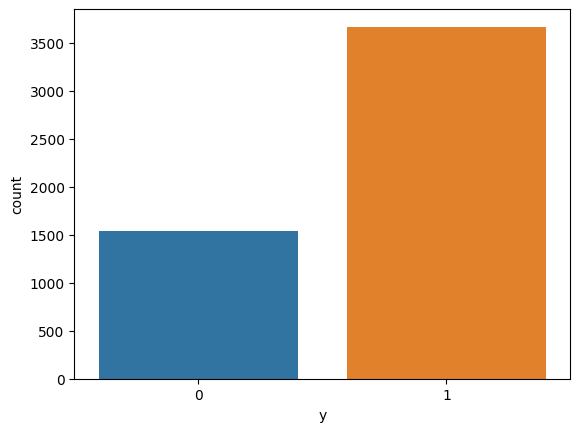

In [ ]:
import seaborn as sns

sns.countplot(x = "y", data = df_temp)
plt.show()

In [ ]:
df_temp2 = df_temp2 = df_temp[df_temp['rating'] == 5]

In [ ]:
positive = list(df_temp2[(df_temp2['review'].str.len() > 100) & (df_temp2['review'].str.len() < 350)]['review'])
len(positive)

237

In [ ]:
!pip install nlpaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 KB 21.8 MB/s eta 0:00:00


In [ ]:
import nlpaug.augmenter.word as naw

In [ ]:
positive[41:49]

["I'm happy to buy this product..design very good..call quality superb..battery backup also good..thank you flipkart ",
 'sound quality very good bass medium loudness missing build quality ok no problem call quality good battery backup very good',
 ' The best quality headphone  are happy packing properly packing crack look  this headphone Bluetooth smooth heavy  bass   ',
 ' Good working  but product quality is weak good battery backup up it work 12 hour product is well thanks you aroma . ',
 'Fantastic purchase ,I am happy.  Good  battery back up, good performance.      But have no redial options.',
 'Thanks for the product, FLIPKART..!!the headphones are working properly and awesomeQuality was good awesomeSatisfied Tq ',
 'I am writing this review after using it for a week. In this price point it is a worthy product. 1. Battery backup is good which can last long upto 2-3 days on moderate use. On heavy usage it can run entire day.2. Mic quality is nice it cancels the background noise.

In [ ]:
aug = naw.AntonymAug(name='Antonym_Aug', aug_min=1, aug_max=10, aug_p=0.3, lang='eng', stopwords=en_stopwords, tokenizer=None, 
                     reverse_tokenizer=None, stopwords_regex=None, verbose=0)
 
aug_negative = aug.augment(positive)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
len(aug_negative)

237

In [ ]:
aug_negative[41:49]

["I ' m unhappy to sell this product. . design very bad. . call quality superb. . battery backup also bad. . thank you flipkart",
 'unsound quality very bad bass medium loudness attend build quality ok no problem call quality evil battery backup very evil',
 'The bad quality headphone are unhappy unpack improperly unpack crack look this headphone Bluetooth smooth light bass',
 'Bad working but product quality is strong bad battery backup up it malfunction 12 hour product is badly thanks you aroma.',
 'Fantastic purchase, I am unhappy. Bad battery ahead up, evil performance. But have no redial options.',
 'Thanks for the product, FLIPKART. .! ! the headphones are idle improperly and awesomeQuality was bad awesomeSatisfied Tq',
 'I am writing this review after using it for a week. In this price point it is a unworthy product. 1. Battery backup is evil which can first short upto 2 - 3 days on immoderate use. On light usage it can idle entire day. 2. Mic quality is nasty it cancels the bac

In [ ]:
df_negative = pd.DataFrame({"review" : aug_negative, 'y' : [0]*len(aug_negative)})

In [ ]:
df_positive = pd.DataFrame({"review" : positive, 'y' : [1]*len(positive)})

In [ ]:
df_temp = pd.concat([df_negative, df_positive]).sample(frac = 1, random_state = 11).reset_index(drop=True)

In [ ]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  474 non-null    object
 1   y       474 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.5+ KB


In [ ]:
df_temp.head()

,review,y
0,genuine review after usageGo for it blindly....,1
1,Sound quality is very good and chargen speed...,1
2,It was bad quality product and it ' s sound is...,0
3,"From the day i sell it, the product is idle ni...",0
4,This product is a amezing product... Flipkart...,1


In [ ]:
df_temp = df_temp.iloc[:,[0,1]]

In [ ]:
df_temp.head()

,review,y
0,genuine review after usageGo for it blindly....,1
1,Sound quality is very good and chargen speed...,1
2,It was bad quality product and it ' s sound is...,0
3,"From the day i sell it, the product is idle ni...",0
4,This product is a amezing product... Flipkart...,1


In [ ]:
df = df_temp

In [ ]:
df.head()

,review,y
0,genuine review after usageGo for it blindly....,1
1,Sound quality is very good and chargen speed...,1
2,It was bad quality product and it ' s sound is...,0
3,"From the day i sell it, the product is idle ni...",0
4,This product is a amezing product... Flipkart...,1


In [ ]:
def preprocessing(text):
    
    text = remove_url(text) 
    text = uni.normalize('NFKD', text)
    text = handle_emoji(text)
    text = text.lower() 
    text = re.sub(r'[^\w\s]', '', text)
    text = word_tokenizer(text)
    # text = stemming(text)
    text = lemmatization(text)
    text = remove_stopwords(text)
    text = " ".join(text)

    return text

In [ ]:
from tqdm import tqdm

tqdm.pandas()

df['clean_review'] = df['review'].progress_map(preprocessing)

100%|██████████| 474/474 [00:05<00:00, 89.60it/s]


In [ ]:
df.head()

,review,y,clean_review
0,genuine review after usageGo for it blindly....,1,genuine review usagego blindly waste hard earn...
1,Sound quality is very good and chargen speed...,1,sound quality good chargen speed super price r...
2,It was bad quality product and it ' s sound is...,0,bad quality product sound opaque keep quiet bo...
3,"From the day i sell it, the product is idle ni...",0,day I sell product idle nicely one time rechar...
4,This product is a amezing product... Flipkart...,1,product ameze product flipkart good app please...


In [ ]:
reviews = df.clean_review.values.tolist()

In [ ]:
from tqdm import tqdm

tqdm.pandas()

df['clean_review2'] = df['clean_review'].progress_map(word_tokenizer)

100%|██████████| 474/474 [00:00<00:00, 140830.21it/s]


In [ ]:
df.head()

,review,y,clean_review,clean_review2
0,genuine review after usageGo for it blindly....,1,genuine review usagego blindly waste hard earn...,"[genuine, review, usagego, blindly, waste, har..."
1,Sound quality is very good and chargen speed...,1,sound quality good chargen speed super price r...,"[sound, quality, good, chargen, speed, super, ..."
2,It was bad quality product and it ' s sound is...,0,bad quality product sound opaque keep quiet bo...,"[bad, quality, product, sound, opaque, keep, q..."
3,"From the day i sell it, the product is idle ni...",0,day I sell product idle nicely one time rechar...,"[day, i, sell, product, idle, nicely, one, tim..."
4,This product is a amezing product... Flipkart...,1,product ameze product flipkart good app please...,"[product, ameze, product, flipkart, good, app,..."


In [ ]:
data_words = df['clean_review2'].values.tolist()
len(data_words)

474

In [ ]:
df.head()

,review,y,clean_review,clean_review2
0,genuine review after usageGo for it blindly....,1,genuine review usagego blindly waste hard earn...,"[genuine, review, usagego, blindly, waste, har..."
1,Sound quality is very good and chargen speed...,1,sound quality good chargen speed super price r...,"[sound, quality, good, chargen, speed, super, ..."
2,It was bad quality product and it ' s sound is...,0,bad quality product sound opaque keep quiet bo...,"[bad, quality, product, sound, opaque, keep, q..."
3,"From the day i sell it, the product is idle ni...",0,day I sell product idle nicely one time rechar...,"[day, i, sell, product, idle, nicely, one, tim..."
4,This product is a amezing product... Flipkart...,1,product ameze product flipkart good app please...,"[product, ameze, product, flipkart, good, app,..."


In [ ]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
#print(corpus[:1][0][:30])


In [ ]:
data_words

[['genuine',
  'review',
  'usagego',
  'blindly',
  'waste',
  'hard',
  'earn',
  'money',
  'anything',
  'expensive',
  'thing',
  'goodwill',
  'editupdate',
  'review',
  'i',
  'find',
  'issue'],
 ['sound',
  'quality',
  'good',
  'chargen',
  'speed',
  'super',
  'price',
  'range',
  'okay',
  'battery',
  'backup',
  '40',
  'hour'],
 ['bad',
  'quality',
  'product',
  'sound',
  'opaque',
  'keep',
  'quiet',
  'boat',
  'name',
  'ship',
  'sound',
  'like',
  'flying',
  'sky',
  'wonderful',
  'evil',
  'one',
  'product',
  'sell',
  'product',
  'keep',
  'easy',
  'ear',
  'nasty',
  'product'],
 ['day',
  'i',
  'sell',
  'product',
  'idle',
  'nicely',
  'one',
  'time',
  'recharge',
  'come',
  'two',
  'three',
  'day',
  'use',
  'normaly',
  'use',
  'continously',
  'might',
  'bear',
  'empty',
  'day',
  'sound',
  'ill',
  'define',
  'bass',
  'also',
  'bad'],
 ['product',
  'ameze',
  'product',
  'flipkart',
  'good',
  'app',
  'please',
  'gye',
 

In [ ]:
print(id2word)

Dictionary<1146 unique tokens: ['anything', 'blindly', 'earn', 'editupdate', 'expensive']...>


In [ ]:
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 2),
  (13, 1),
  (14, 1),
  (15, 1)],
 [(16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1)],
 [(24, 1),
  (26, 2),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 2),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 4),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1)],
 [(9, 1),
  (26, 1),
  (29, 1),
  (39, 1),
  (41, 1),
  (43, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 3),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 2)],
 [(20, 1),
  (41, 2),
  (65, 1),
  (66, 2),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1)],
 [(17, 1),
  (18, 1),
  (23, 1),
  (24, 2),
  (25, 1),
  (29, 2),
  (33, 1),
  (48

In [ ]:
df['clean_review2']

0      [genuine, review, usagego, blindly, waste, har...
1      [sound, quality, good, chargen, speed, super, ...
2      [bad, quality, product, sound, opaque, keep, q...
3      [day, i, sell, product, idle, nicely, one, tim...
4      [product, ameze, product, flipkart, good, app,...
5      [bass, quality, bad, price, range, bad, batter...
6      [bad, product, price, price, pro, 1, unsound, ...
7      [i, use, product, nearly, 8, month, product, m...
8      [excellent, battery, backup, remarkably, i, ta...
9      [gift, husband, dislike, lot, unsound, quality...
10     [nice, product, i, unhappy, deel, product, bat...
11     [love, sound, quality, love, base, bild, quali...
12     [prosperfect, fit, great, battery, life, great...
13     [sound, quality, good, bass, medium, loudness,...
14     [sound, good, much, worthy, price, happy, than...
15     [product, good, please, buy, 1, year, warranty...
16     [good, product, battery, life, good, sound, ef...
17     [good, sound, quality, g

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import accuracy_score


# Split the dataset into train and test sets
train_size = int(0.8 * len(df))
train_df = df[:train_size]
test_df = df[train_size:]

# Extract the cleaned and tokenized reviews as features
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_features = vectorizer.fit_transform(train_df['clean_review2'].astype(str))
test_features = vectorizer.transform(test_df['clean_review2'].astype(str))

# Train a Naive Bayes classifier for sentiment analysis
clf = MultinomialNB()
clf.fit(train_features, train_df['y'])

# Test the classifier on the test set and print the accuracy
test_predictions = clf.predict(test_features)
accuracy = accuracy_score(test_df['y'], test_predictions)
print("Test accuracy: ", accuracy)

# Define the aspects
aspects = ["design build", "value for money", "battery backup"]

# Train an LDA model on the training set to identify topics
lda_model = LatentDirichletAllocation(n_components=len(aspects), random_state=42)
lda_model.fit(train_features)
lda_topics = aspects

def aspect_sentiment_analysis(text, clf, vectorizer, lda_model, lda_topics):
    sid = SentimentIntensityAnalyzer()
    sentences = nltk.sent_tokenize(text)
    aspect_scores = {topic: {"positive": 0, "negative": 0} for topic in lda_topics}
    for sentence in sentences:
        sentiment_score = clf.predict(vectorizer.transform([sentence]))
        sentiment = "positive" if sentiment_score == 1 else "negative"
        sentiment_scores = sid.polarity_scores(sentence)
        sentence_topics = lda_model.transform(vectorizer.transform([sentence]))[0]
        for i, topic_score in enumerate(sentence_topics):
            if topic_score >= 0.1:
                if sentiment_scores['compound'] >= 0.05:
                    aspect_scores[lda_topics[i]]["positive"] += 1
                elif sentiment_scores['compound'] <= -0.05:
                    aspect_scores[lda_topics[i]]["negative"] += 1
    overall_sentiment_score = clf.predict(vectorizer.transform([text]))
    overall_sentiment = "positive" if overall_sentiment_score == 1 else "negative"
    print("Individual aspect scores:")
    for aspect, scores in aspect_scores.items():
        print(f"{aspect}: positive={scores['positive']}, negative={scores['negative']}")
    max_aspect = None
    max_score = -1
    for aspect, scores in aspect_scores.items():
        if scores[overall_sentiment] > max_score:
            max_score = scores[overall_sentiment]
            max_aspect = aspect
    print(f"Overall sentiment: {overall_sentiment}")
    print(f"Best aspect match: {max_aspect} ({overall_sentiment})")

Test accuracy:  0.8736842105263158


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Example usage
text = "These go on for days wihtout charging I am very happy"
aspect_sentiment_analysis(text, clf, vectorizer, lda_model, lda_topics)

Individual aspect scores:
design build: positive=0, negative=0
value for money: positive=1, negative=0
battery backup: positive=1, negative=0
Overall sentiment: positive
Best aspect match: value for money (positive)


In [ ]:
text = "Design is too bad and my money is wasted, and the battery doesn't last long"
aspect_sentiment_analysis(text, clf, vectorizer, lda_model, lda_topics)

Individual aspect scores:
design build: positive=0, negative=1
value for money: positive=0, negative=1
battery backup: positive=0, negative=1
Overall sentiment: negative
Best aspect match: design build (negative)


In [ ]:
text = "battery is okay and design is good"
aspect_sentiment_analysis(text, clf, vectorizer, lda_model, lda_topics)

Individual aspect scores:
design build: positive=1, negative=0
value for money: positive=0, negative=0
battery backup: positive=1, negative=0
Overall sentiment: positive
Best aspect match: design build (positive)
